In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras

In [103]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "admin",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("Connection to DB established!")
        return self.connection

In [104]:
con = PostgresConnection().getConnection()

Connection to DB established!


In [4]:
cur = con.cursor()

select_stmt = "SELECT s.division, s.district, COUNT(*) " \
                "FROM star_schema.fact_table t " \
                "JOIN star_schema.store_dim s on s.store_key=t.store_key " \
                "JOIN star_schema.time_dim tim on tim.time_key=t.time_key " \
                "WHERE tim.month=12 " \
                "GROUP BY CUBE(s.division, s.district, tim.month) " \
                "ORDER BY s.division"
cur.execute(select_stmt)
record = cur.fetchall()

In [5]:
record

[('BARISAL', None, 6045),
 ('BARISAL', 'BARGUNA', 684),
 ('BARISAL', 'BARISAL', 2303),
 ('BARISAL', 'PIROJPUR', 839),
 ('BARISAL', 'BHOLA', 816),
 ('BARISAL', 'PATUAKHALI', 932),
 ('BARISAL', None, 6045),
 ('BARISAL', 'JHALOKATI', 471),
 ('BARISAL', 'PATUAKHALI', 932),
 ('BARISAL', 'PIROJPUR', 839),
 ('BARISAL', 'BARGUNA', 684),
 ('BARISAL', 'BARISAL', 2303),
 ('BARISAL', 'BHOLA', 816),
 ('BARISAL', 'JHALOKATI', 471),
 ('CHITTAGONG', 'BANDARBAN', 820),
 ('CHITTAGONG', 'LAKSHMIPUR', 596),
 ('CHITTAGONG', 'KHAGRACHHARI', 919),
 ('CHITTAGONG', 'FENI', 710),
 ('CHITTAGONG', 'FENI', 710),
 ('CHITTAGONG', 'LAKSHMIPUR', 596),
 ('CHITTAGONG', None, 15808),
 ('CHITTAGONG', None, 15808),
 ('CHITTAGONG', 'RANGAMATI', 1196),
 ('CHITTAGONG', 'CHANDPUR', 875),
 ('CHITTAGONG', 'COMILLA', 1816),
 ('CHITTAGONG', 'BANDARBAN', 820),
 ('CHITTAGONG', 'CHANDPUR', 875),
 ('CHITTAGONG', 'KHAGRACHHARI', 919),
 ('CHITTAGONG', 'BRAHMANBARIA', 1093),
 ('CHITTAGONG', "COX'S BAZAR", 923),
 ('CHITTAGONG', 'CHITTAGON

In [6]:
record_load = pd.DataFrame(list(record), columns=['divison', 'district', 'sales'])

In [7]:
record_load

,divison,district,sales
0,BARISAL,None,6045
1,BARISAL,BARGUNA,684
2,BARISAL,BARISAL,2303
3,BARISAL,PIROJPUR,839
4,BARISAL,BHOLA,816
...,...,...,...
267,None,CHITTAGONG,5866
268,None,BARISAL,2303
269,None,MANIKGANJ,798
270,None,GAZIPUR,603


In [8]:
select_stmt2 = "SELECT s.division, COUNT(*) " \
                "FROM star_schema.fact_table t " \
                "JOIN star_schema.store_dim s on s.store_key=t.store_key " \
                "JOIN star_schema.time_dim tim on tim.time_key=t.time_key " \
                "WHERE tim.month=12 " \
                "GROUP BY s.division " \
                "ORDER BY s.division"
cur.execute(select_stmt2)
record_n = cur.fetchall()

In [9]:
df = pd.DataFrame(list(record_n), columns=['divison', 'sales'])

In [10]:
df

,divison,sales
0,BARISAL,6045
1,CHITTAGONG,15808
2,DHAKA,32536
3,KHULNA,9006
4,RAJSHAHI,9781
5,RANGPUR,6878
6,SYLHET,4377


In [11]:
pip install matplotlib

     ---------------------------------------- 7.2/7.2 MB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 3.2/3.2 MB 4.8 MB/s eta 0:00:00
     ---------------------------------------- 52.1/52.1 KB ? eta 0:00:00
     -------------------------------------- 895.5/895.5 KB 4.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


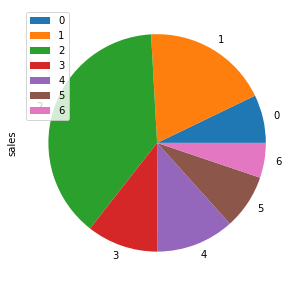

In [12]:
plot = df.plot.pie(x='division', y='sales', figsize=(5, 5))

In [13]:
df.dtypes

divison    object
sales       int64
dtype: object

In [14]:
df['sales'] = df['sales'].astype('float64')

In [15]:
df = df.set_index(['divison'])

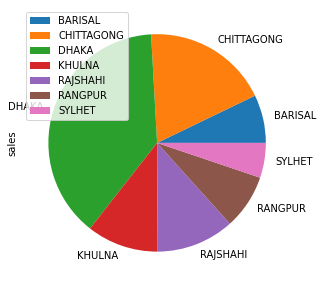

In [16]:
plot = df.plot.pie(x='division', y='sales', figsize=(5, 5))

In [17]:
df

,sales
divison,
BARISAL,6045.0
CHITTAGONG,15808.0
DHAKA,32536.0
KHULNA,9006.0
RAJSHAHI,9781.0
RANGPUR,6878.0
SYLHET,4377.0


# Q1 Find the division/district/year/month wise total_sale_price joining fact table and respective dimension table

In [18]:
# CUBE
cur = con.cursor()
q1 = "SELECT s.division, s.district, tim.year, tim.month, COUNT(t.total_price) " \
                "FROM star_schema.fact_table t " \
                "JOIN star_schema.store_dim s on s.store_key=t.store_key " \
                "JOIN star_schema.time_dim tim on tim.time_key=t.time_key " \
                "GROUP BY CUBE(s.division, s.district, tim.year, tim.month) " \
                "ORDER BY s.division"
cur.execute(q1)
record_n = cur.fetchall()

In [19]:
record_n

[('BARISAL', 'JHALOKATI', 2018, None, 777),
 ('BARISAL', 'BARGUNA', 2019, 7, 91),
 ('BARISAL', 'PIROJPUR', 2014, 5, 123),
 ('BARISAL', 'PATUAKHALI', 2018, 3, 116),
 ('BARISAL', 'PATUAKHALI', 2016, 5, 161),
 ('BARISAL', 'BHOLA', 2016, 1, 110),
 ('BARISAL', 'PIROJPUR', None, 3, 833),
 ('BARISAL', 'BARGUNA', 2019, 3, 96),
 ('BARISAL', 'BARISAL', 2020, 9, 334),
 ('BARISAL', 'BARGUNA', 2015, 1, 93),
 ('BARISAL', 'PIROJPUR', 2016, 7, 127),
 ('BARISAL', 'PIROJPUR', 2014, 3, 106),
 ('BARISAL', 'PIROJPUR', 2014, 10, 101),
 ('BARISAL', None, 2019, 5, 872),
 ('BARISAL', 'BARISAL', 2016, 2, 328),
 ('BARISAL', 'JHALOKATI', 2014, 5, 65),
 ('BARISAL', 'BARGUNA', None, 3, 681),
 ('BARISAL', 'BHOLA', 2018, 8, 136),
 ('BARISAL', 'BARGUNA', None, 5, 737),
 ('BARISAL', 'BHOLA', 2020, 5, 93),
 ('BARISAL', 'BARGUNA', None, 9, 647),
 ('BARISAL', 'BARGUNA', 2016, 11, 94),
 ('BARISAL', 'BARISAL', 2014, 6, 340),
 ('BARISAL', 'BARISAL', None, 2, 2110),
 ('BARISAL', 'PIROJPUR', 2017, 8, 143),
 ('BARISAL', 'BARISA

In [20]:
df_q1 = pd.DataFrame(list(record_n), columns=['divison', 'district', 'year', 'month','total_sales_price'])

In [21]:
df_q1

,divison,district,year,month,total_sales_price
0,BARISAL,JHALOKATI,2018.0,NaN,777
1,BARISAL,BARGUNA,2019.0,7.0,91
2,BARISAL,PIROJPUR,2014.0,5.0,123
3,BARISAL,PATUAKHALI,2018.0,3.0,116
4,BARISAL,PATUAKHALI,2016.0,5.0,161
...,...,...,...,...,...
14411,None,MAGURA,2019.0,NaN,808
14412,None,MUNSHIGANJ,2018.0,NaN,1151
14413,None,NARSINGDI,2018.0,NaN,1204
14414,None,MAULVIBAZAR,2014.0,NaN,1275


# DIVISION WISE

In [37]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "admin",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("Connection to DB established!")
        return self.connection

In [38]:
con = PostgresConnection().getConnection()

Connection to DB established!


In [44]:
cur = con.cursor()
q1 = "SELECT  s.division, SUM(ft.total_price) " \
                    "FROM star_schema.fact_table ft " \
                    "JOIN star_schema.store_dim s ON ft.store_key=s.store_key " \
                    "GROUP BY s.division " \
                    "ORDER BY s.division"
cur.execute(q1)
record_n = cur.fetchall()

div = pd.DataFrame(list(record_n), columns=['division', 'sales'])
div

,division,sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25


In [40]:
#Change type function
def changeType2Float(input):
    input['sales'] = input['sales'].astype('float64')

In [45]:
changeType2Float(div)

In [46]:
div_res=div.set_index(['division'])

<AxesSubplot:ylabel='sales'>

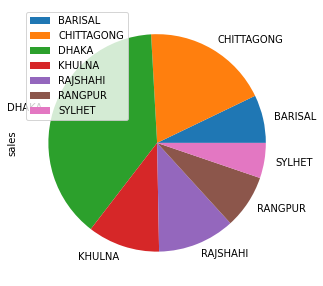

In [47]:
div_res.plot.pie(y='sales',figsize=(5,5))

# DISTRICT

In [48]:
cur = con.cursor()
q1_dis = "SELECT  s.district, SUM(ft.total_price) " \
                    "FROM star_schema.fact_table ft " \
                    "JOIN star_schema.store_dim s ON ft.store_key=s.store_key " \
                    "GROUP BY s.district " \
                    "ORDER BY s.district"
cur.execute(q1_dis)
record_n = cur.fetchall()

dis_res = pd.DataFrame(list(record_n), columns=['district', 'sales'])
dis_res

,district,sales
0,BAGERHAT,1307651.00
1,BANDARBAN,995360.75
2,BARGUNA,869041.00
3,BARISAL,2897237.75
4,BHOLA,1012205.75
...,...,...
59,SIRAJGANJ,1295100.75
60,SUNAMGANJ,1593774.00
61,SYLHET,1727717.25
62,TANGAIL,1774650.25


In [50]:
changeType2Float(dis_res)
dis_res=dis_res.set_index(['district'])

In [51]:
dis_res

,sales
district,
BAGERHAT,1307651.00
BANDARBAN,995360.75
BARGUNA,869041.00
BARISAL,2897237.75
BHOLA,1012205.75
...,...
SIRAJGANJ,1295100.75
SUNAMGANJ,1593774.00
SYLHET,1727717.25


In [106]:
import matplotlib as plt

<AxesSubplot:ylabel='sales'>

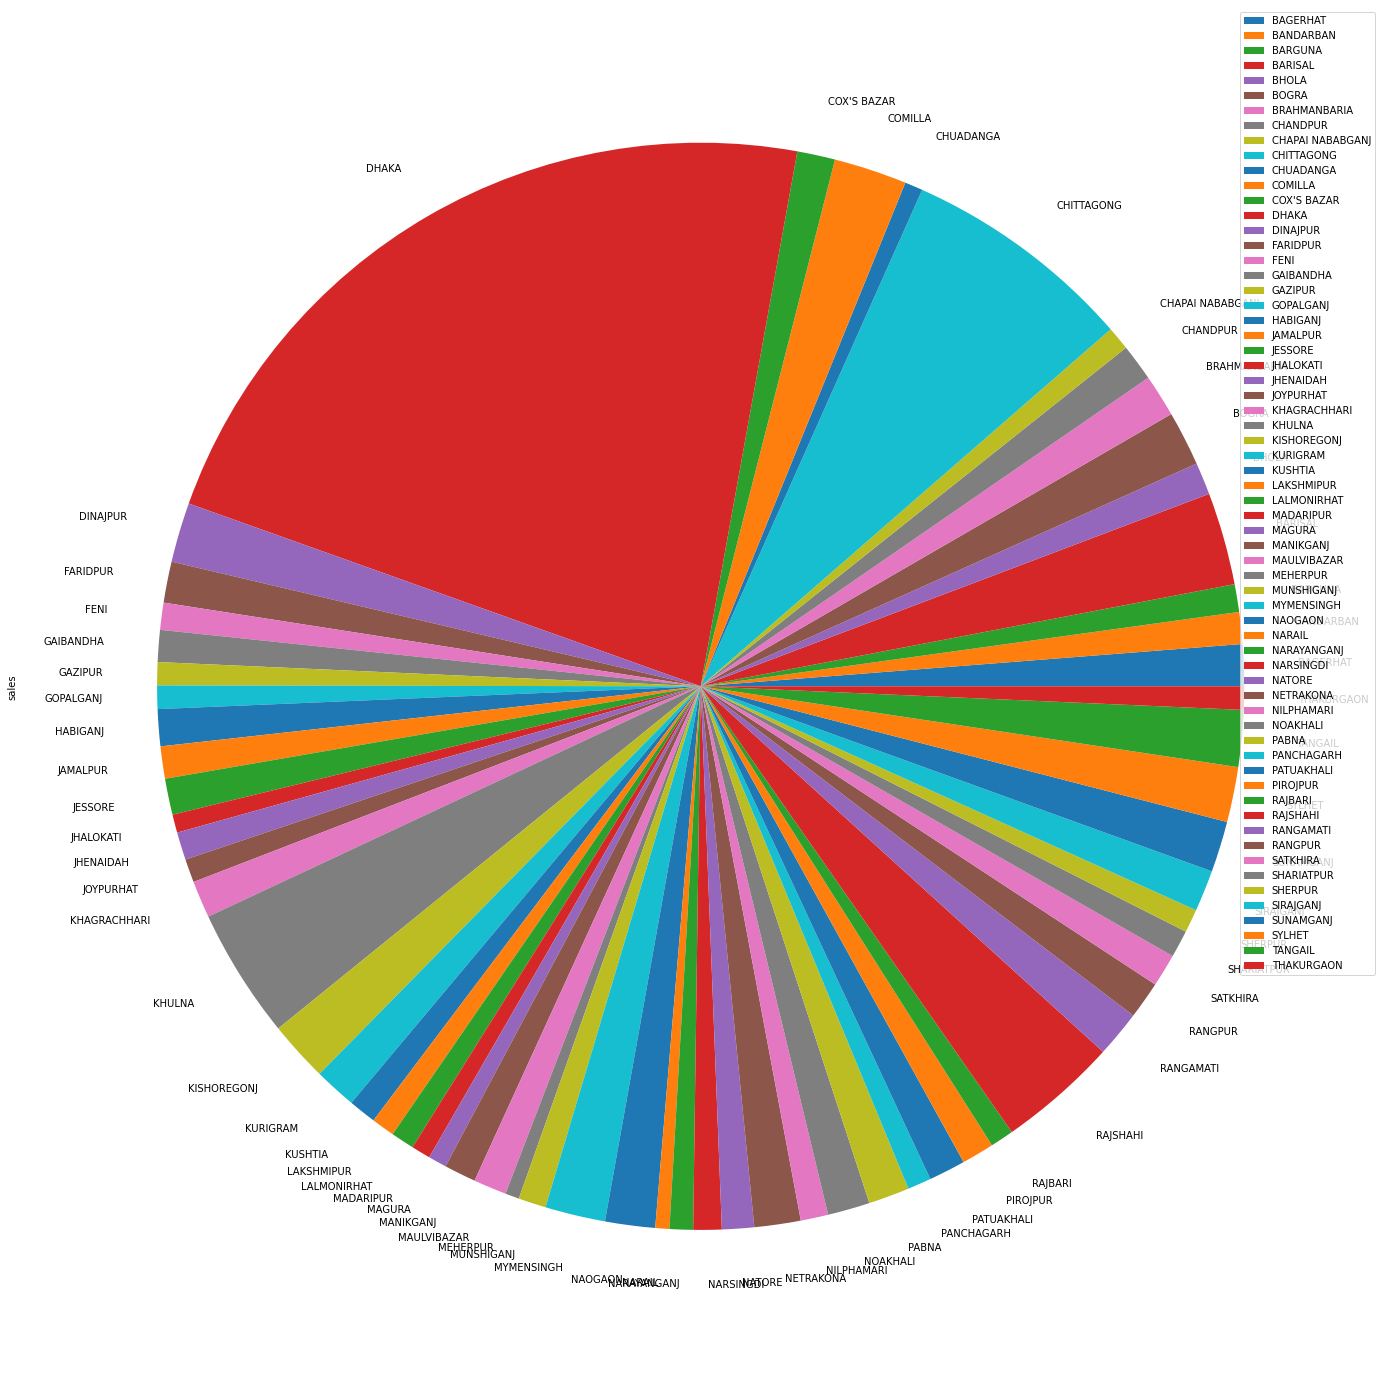

In [60]:
dis_res.plot.pie(y='sales',figsize=(25,25))

# YEAR 

In [74]:
cur = con.cursor()
q1_year = "SELECT  tim.year, SUM(ft.total_price) " \
                    "FROM star_schema.fact_table ft " \
                    "JOIN star_schema.time_dim tim ON ft.time_key=tim.time_key " \
                    "GROUP BY tim.year " \
                    "ORDER BY tim.year"
cur.execute(q1_year)
record_n = cur.fetchall()

year_res = pd.DataFrame(list(record_n), columns=['year', 'sales'])
year_res

,year,sales
0,2014,14334731.25
1,2015,15095720.25
2,2016,14976508.25
3,2017,15015806.00
4,2018,15108197.25
5,2019,14949510.25
6,2020,15037190.25
7,2021,883772.25


In [75]:
changeType2Float(year_res)
year_res=year_res.set_index(['year'])

In [76]:
year_res

,sales
year,
2014,14334731.25
2015,15095720.25
2016,14976508.25
2017,15015806.00
2018,15108197.25
2019,14949510.25
2020,15037190.25
2021,883772.25


<AxesSubplot:ylabel='sales'>

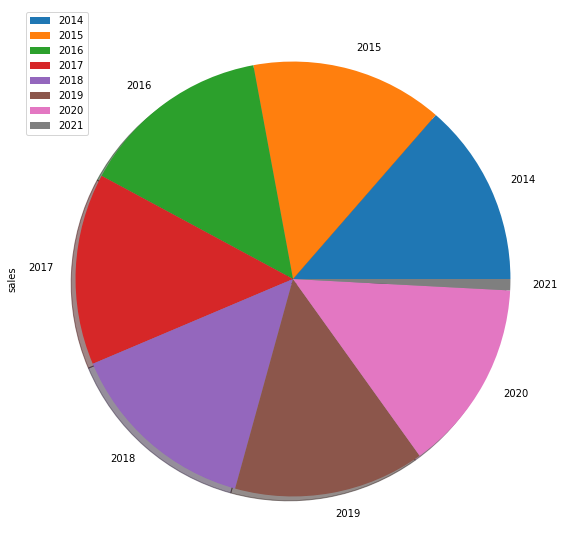

In [79]:
year_res.plot.pie(y='sales',figsize=(10,10), shadow='True')

# MONTH 

In [90]:
cur = con.cursor()
q1_month = "SELECT  tim.month, SUM(ft.total_price) " \
                    "FROM star_schema.fact_table ft " \
                    "JOIN star_schema.time_dim tim ON ft.time_key=tim.time_key " \
                    "GROUP BY tim.month " \
                    "ORDER BY tim.month"
cur.execute(q1_month)
record_n = cur.fetchall()

month_res = pd.DataFrame(list(record_n), columns=['month', 'sales'])
month_res

,month,sales
0,1,9042244.00
1,2,8073877.50
2,3,8939152.00
3,4,8504634.75
4,5,9078002.50
5,6,8556853.00
6,7,9046580.00
7,8,8929475.25
8,9,8724326.50
9,10,8902783.75


In [91]:
changeType2Float(month_res)
month_res=month_res.set_index(['month'])
month_res

,sales
month,
1,9042244.00
2,8073877.50
3,8939152.00
4,8504634.75
5,9078002.50
6,8556853.00
7,9046580.00
8,8929475.25
9,8724326.50


<AxesSubplot:ylabel='sales'>

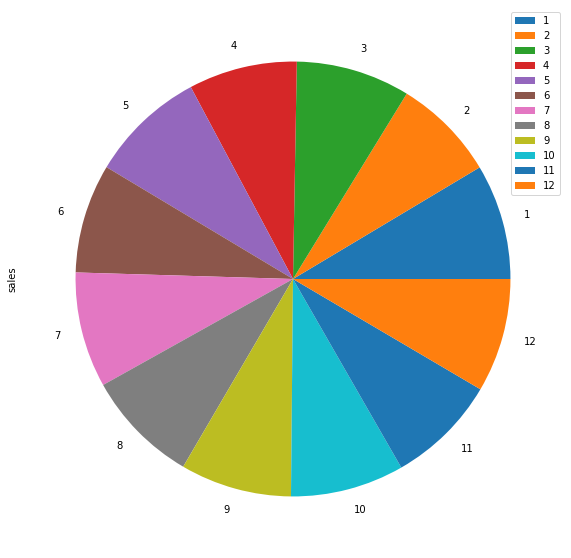

In [92]:
month_res.plot.pie(y='sales',figsize=(10,10))

# Q2: Find the customer/bank/transaction(cash/online) wise total_sale_price joining fact table and respective dimension table

# CUSTOMER 

In [105]:
cur = con.cursor()
q2_customer = "SELECT  cus.name, SUM(ft.total_price) " \
                    "FROM star_schema.fact_table ft " \
                    "JOIN star_schema.customer_dim cus ON ft.customer_key=cus.customer_key " \
                    "GROUP BY cus.name " \
                    "ORDER BY cus.name"
cur.execute(q2_customer)
record_n = cur.fetchall()

customer_res = pd.DataFrame(list(record_n), columns=['name', 'sales'])
customer_res

,name,sales
0,-,20643.50
1,????,21142.50
2,?????,21085.50
3,????? ??,12288.00
4,??????,11010.00
...,...,...
4530,zeba parveen,11094.50
4531,zeenat,11523.00
4532,zenab khan,10292.25
4533,zina kumari,11193.00


In [108]:
changeType2Float(customer_res)
customer_res=customer_res.set_index(['name'])
customer_res

,sales
name,
-,20643.50
????,21142.50
?????,21085.50
????? ??,12288.00
??????,11010.00
...,...
zeba parveen,11094.50
zeenat,11523.00
zenab khan,10292.25


In [109]:
customer_res.plot.pie(y='sales',figsize=(10,10))

<AxesSubplot:ylabel='sales'>

ValueError: Image size of 976x68047 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 720x720 with 1 Axes>

In [110]:
customer_res = customer_res[:10]

In [111]:
customer_res

,sales
name,
-,20643.50
????,21142.50
?????,21085.50
????? ??,12288.00
??????,11010.00
aafreen fatima,11174.75
aafrin,22136.75
aafrin @ dolly,23529.75
aaftaab husan,9682.00


<AxesSubplot:ylabel='sales'>

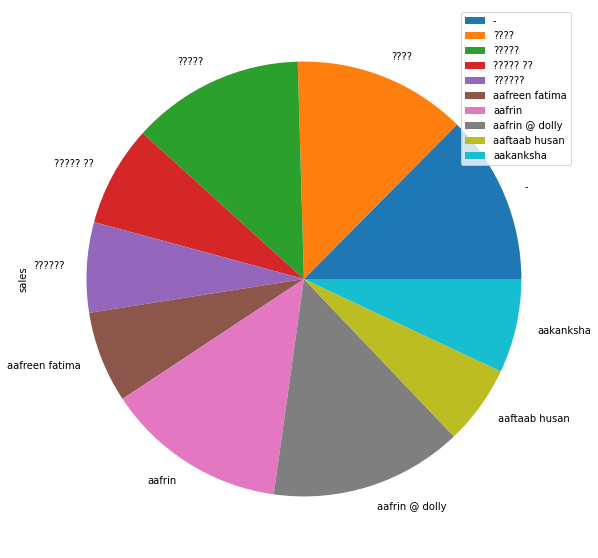

In [112]:
customer_res.plot.pie(y='sales',figsize=(10,10))